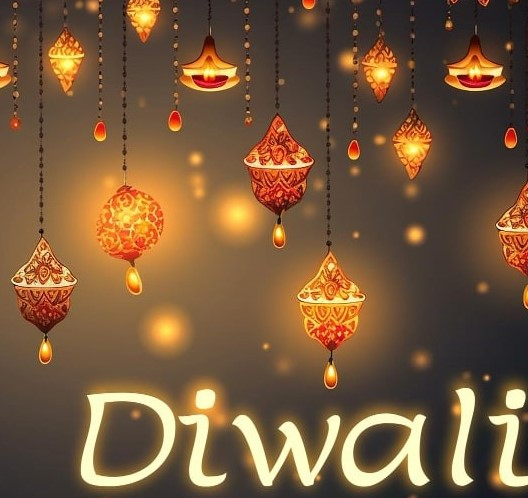


#  import python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\BIA\BIA-main\pratice python/Diwali Sales Data.csv", encoding = 'unicode_escape')

In [3]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.drop(['Status','unnamed1'],axis=1,inplace = True)

In [6]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [9]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [10]:
df.shape

(11239, 13)

In [11]:
df.corr()

,User_ID,Age,Marital_Status,Orders,Amount
User_ID,1.000000,0.022338,0.004345,-0.016022,-0.011997
Age,0.022338,1.000000,-0.012344,0.008090,0.030941
Marital_Status,0.004345,-0.012344,1.000000,-0.003487,-0.017493
Orders,-0.016022,0.008090,-0.003487,1.000000,-0.013183
Amount,-0.011997,0.030941,-0.017493,-0.013183,1.000000


In [12]:
df['Product_ID'].nunique()

2350

In [13]:
df['Amount'].unique()

array([23952., 23934., 23924., ...,   213.,   206.,   188.])

In [14]:
df['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

In [15]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

In [16]:
top_Category = df.Product_Category.value_counts().reset_index().rename(columns={'Product_Category':'Count','index':'Product_Category'})
top_5_category = top_Category.head(6).sort_values(by = ['Count'],ascending = False)
top_5_category

,Product_Category,Count
0,Clothing & Apparel,2655
1,Food,2490
2,Electronics & Gadgets,2087
3,Footwear & Shoes,1059
4,Household items,520
5,Beauty,422


In [17]:
matrics = df.corr()
#matrics['RM'].sort_values(ascending = False)

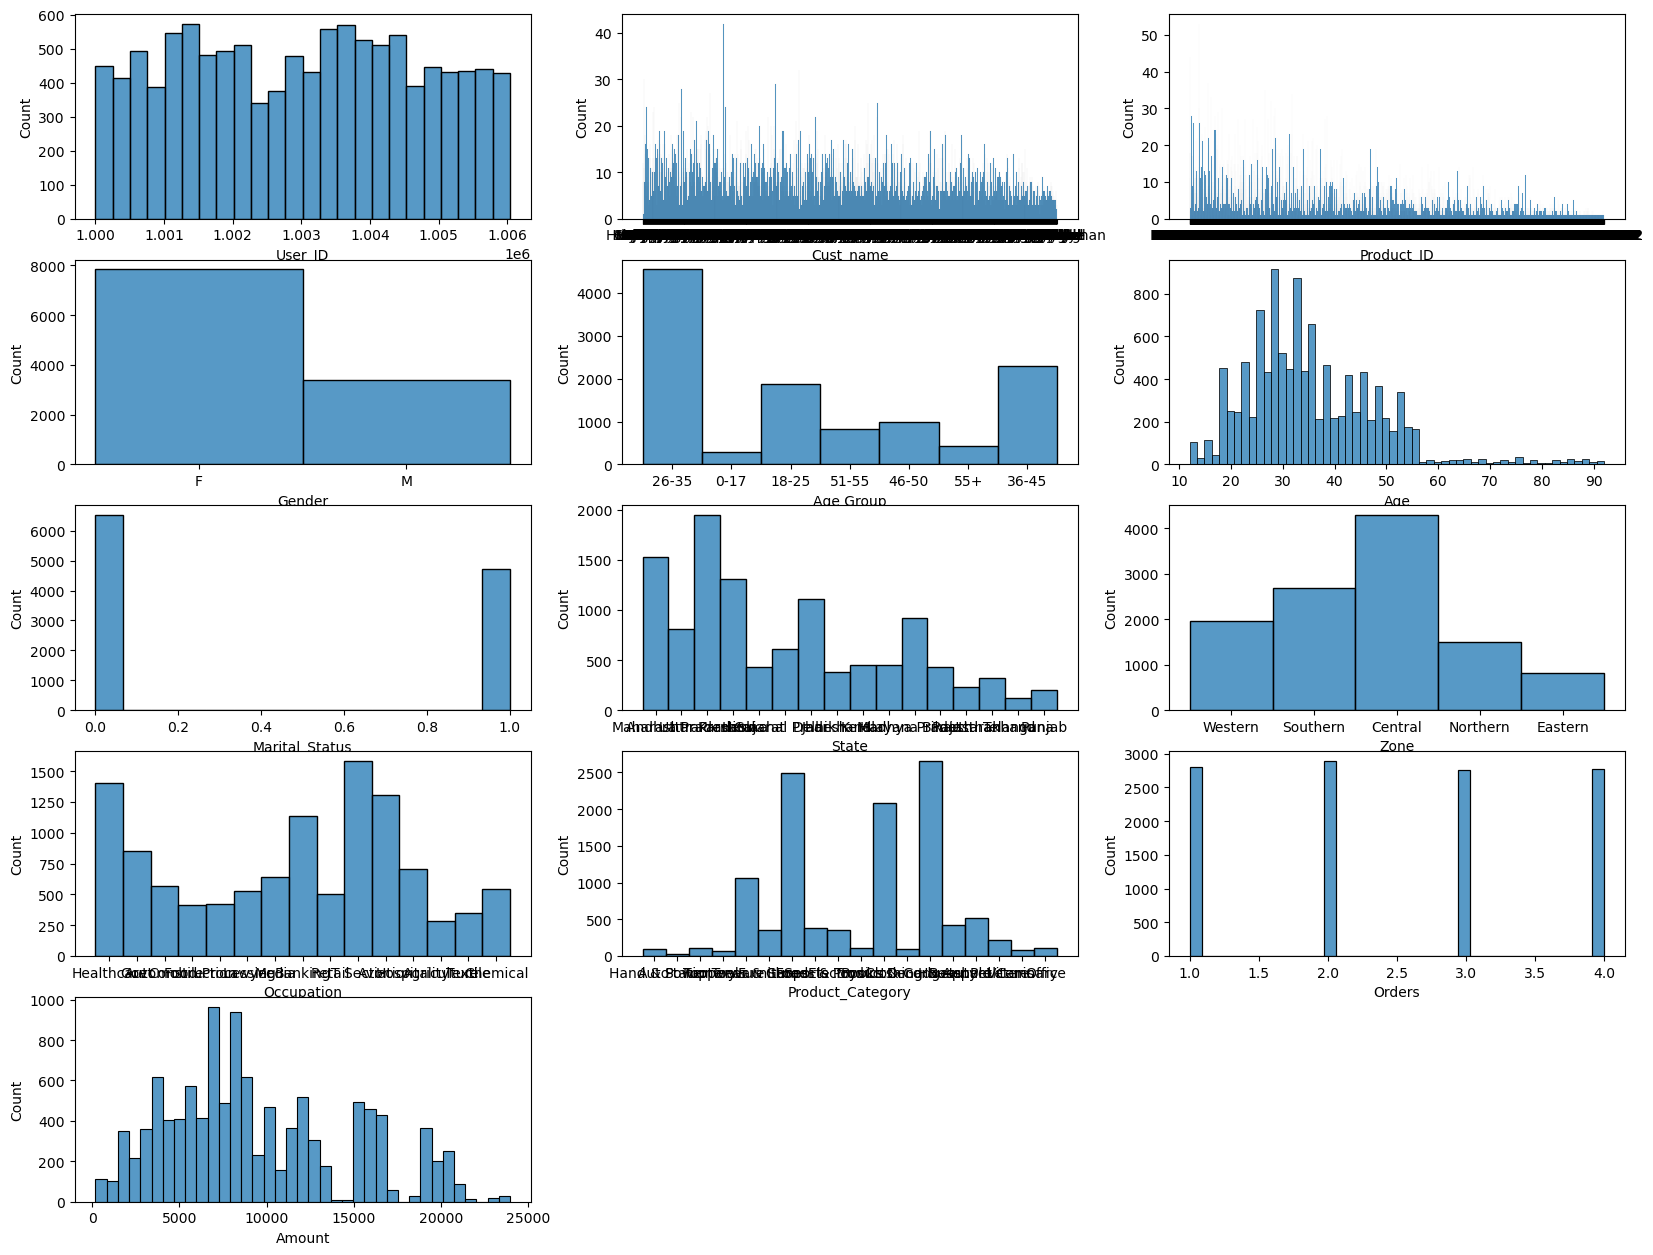

In [18]:
plt.figure(figsize=(20,25))
col_names=df.columns
i=1


for col in (col_names):
    plt.subplot(8,3,i)
    sns.histplot(df[col])
    i=i+1

# Data Visualisation


F    7832
M    3407
Name: Gender, dtype: int64


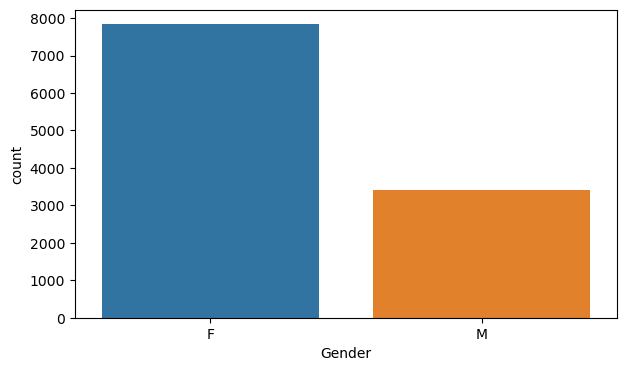

In [19]:
plt.figure(figsize=(7, 4))
sns.countplot(x = 'Gender',data = df)
value_counts = df['Gender'].value_counts()
print(value_counts)     # female has order more product than men

<Axes: xlabel='Gender', ylabel='Amount'>

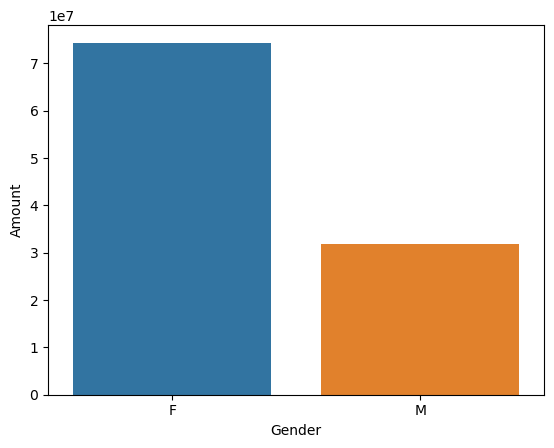

In [20]:
sales = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales)

<Axes: xlabel='Age Group', ylabel='count'>

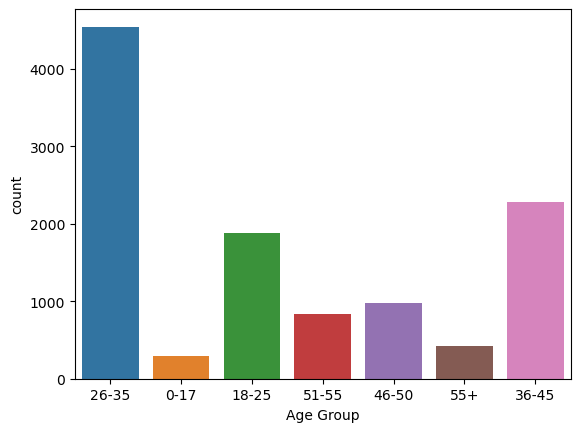

In [21]:
sns.countplot(x ='Age Group',data = df)

<Axes: xlabel='Gender', ylabel='count'>

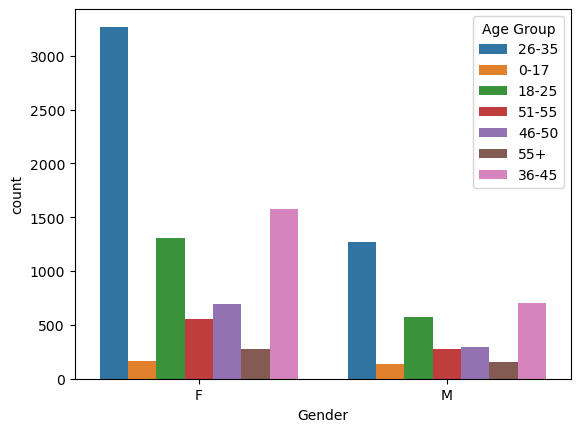

In [22]:
sns.countplot(x ='Gender',hue='Age Group',data =df)

<Axes: xlabel='Age Group', ylabel='Amount'>

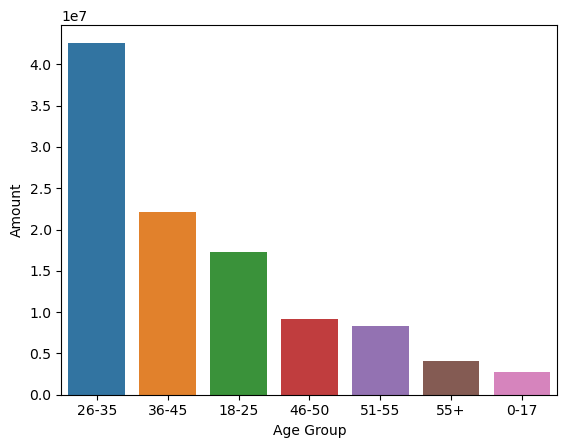

In [23]:
product_sale = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',y= 'Amount' ,data = product_sale)

<Axes: xlabel='Marital_Status', ylabel='count'>

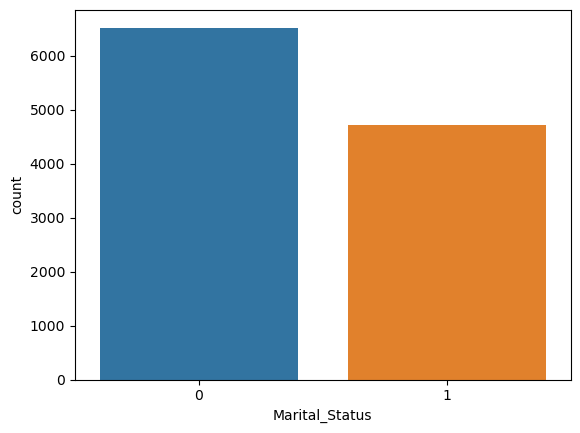

In [24]:
sns.countplot(x ='Marital_Status',data = df) #0-married 1-unmarried

<Axes: xlabel='Marital_Status', ylabel='Amount'>

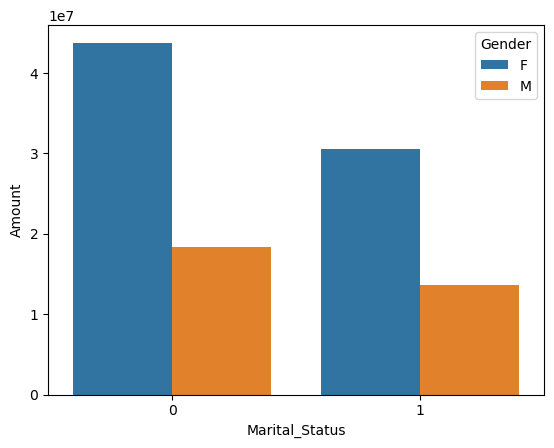

In [25]:
product_sale = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Marital_Status',y= 'Amount' ,data = product_sale,hue = 'Gender')

<Axes: xlabel='State', ylabel='count'>

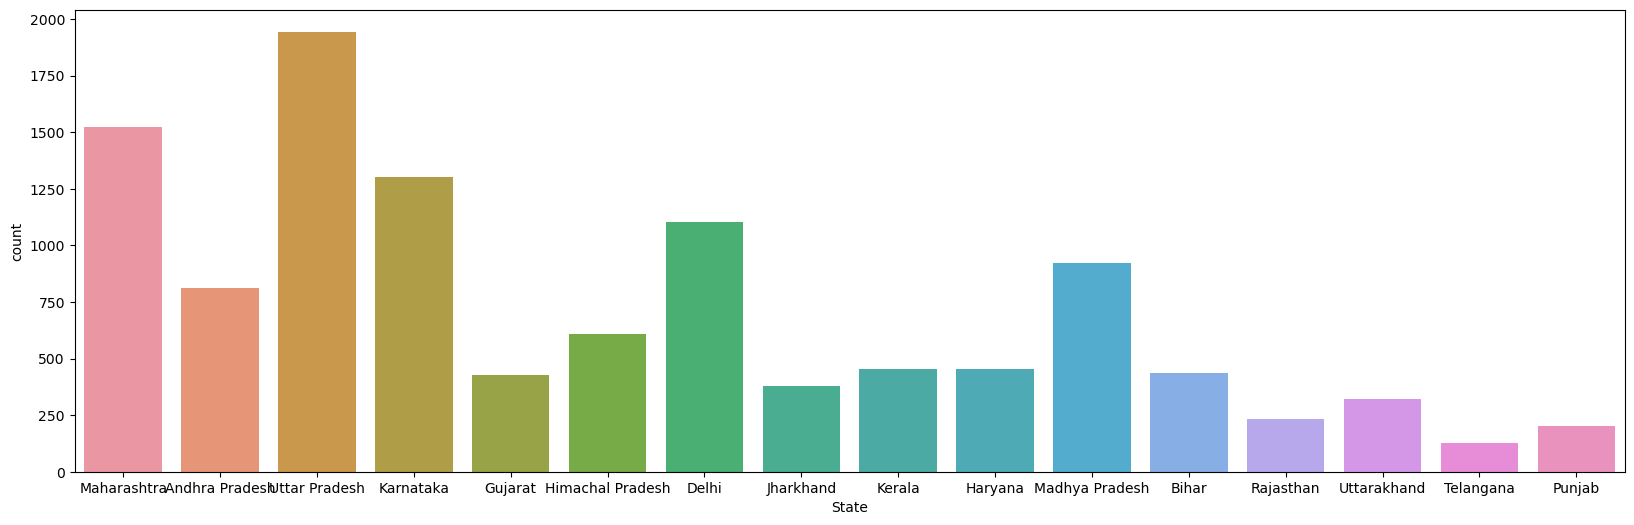

In [26]:
plt.figure(figsize = (20,6))
sns.countplot(x ='State',data = df)

<Axes: xlabel='State', ylabel='count'>

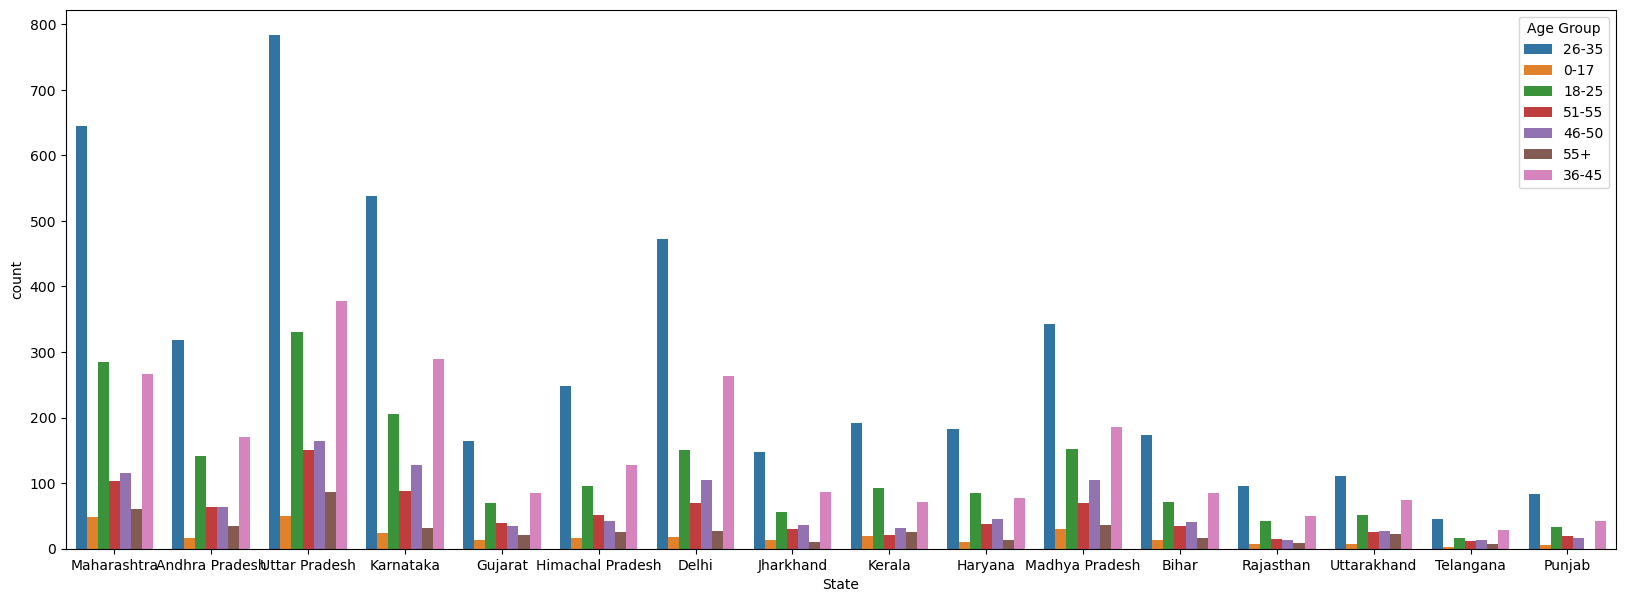

In [27]:
plt.figure(figsize = (20,7))
sns.countplot(x ='State',hue = 'Age Group', data =df)

<Axes: xlabel='State', ylabel='Amount'>

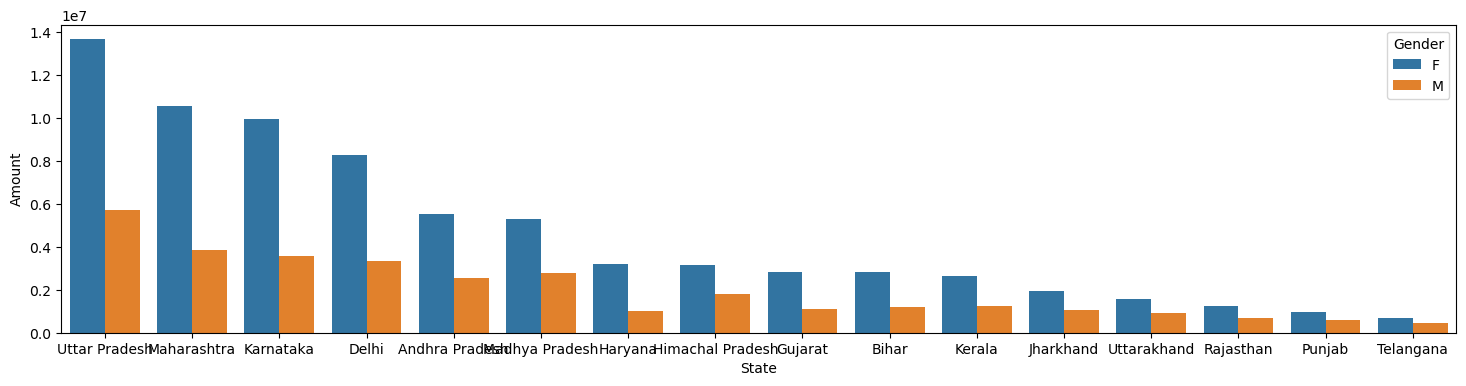

In [28]:
sales_state = df.groupby(['State', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize = (18,4))
sns.barplot(data = sales_state, x = 'State',y= 'Amount', hue='Gender')

<Axes: xlabel='State', ylabel='Amount'>

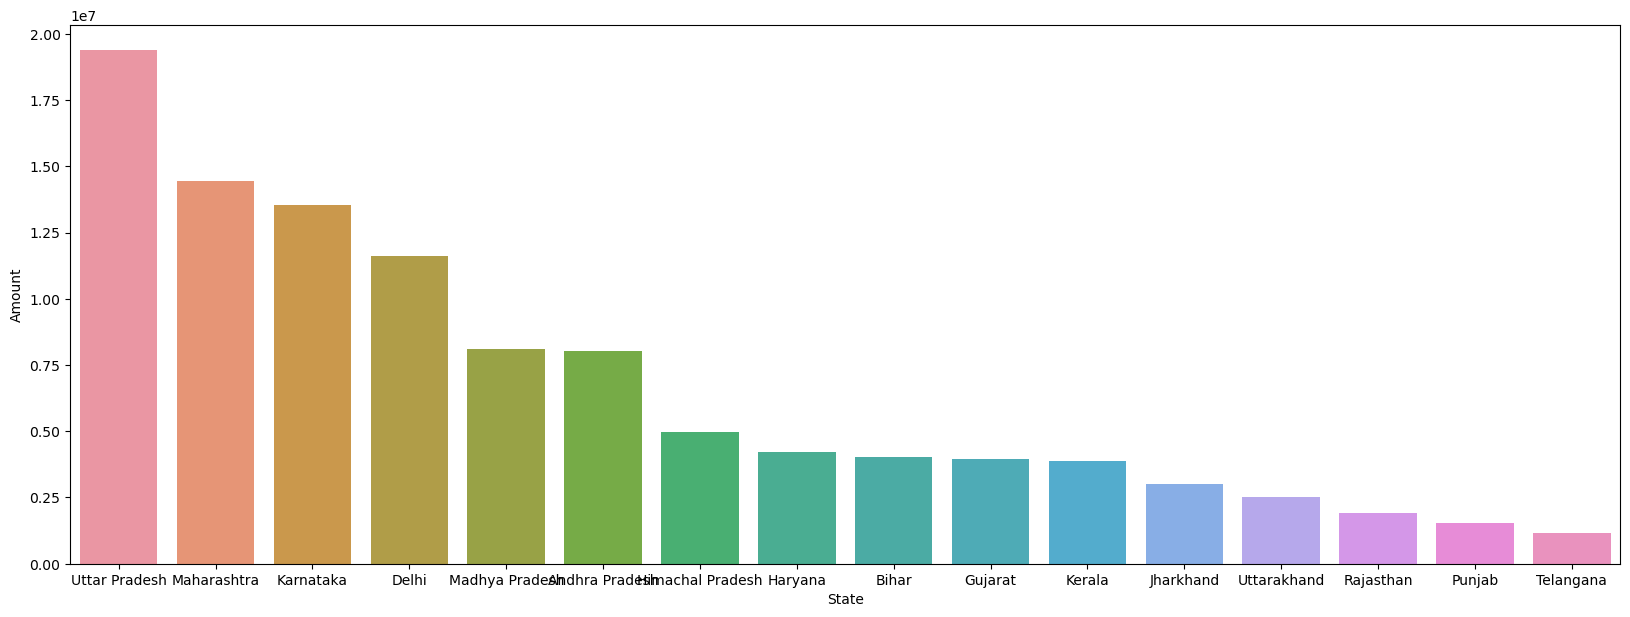

In [29]:
product_sale = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize = (20,7))
sns.barplot(x = 'State',y= 'Amount' ,data = product_sale)

<Axes: xlabel='Occupation', ylabel='count'>

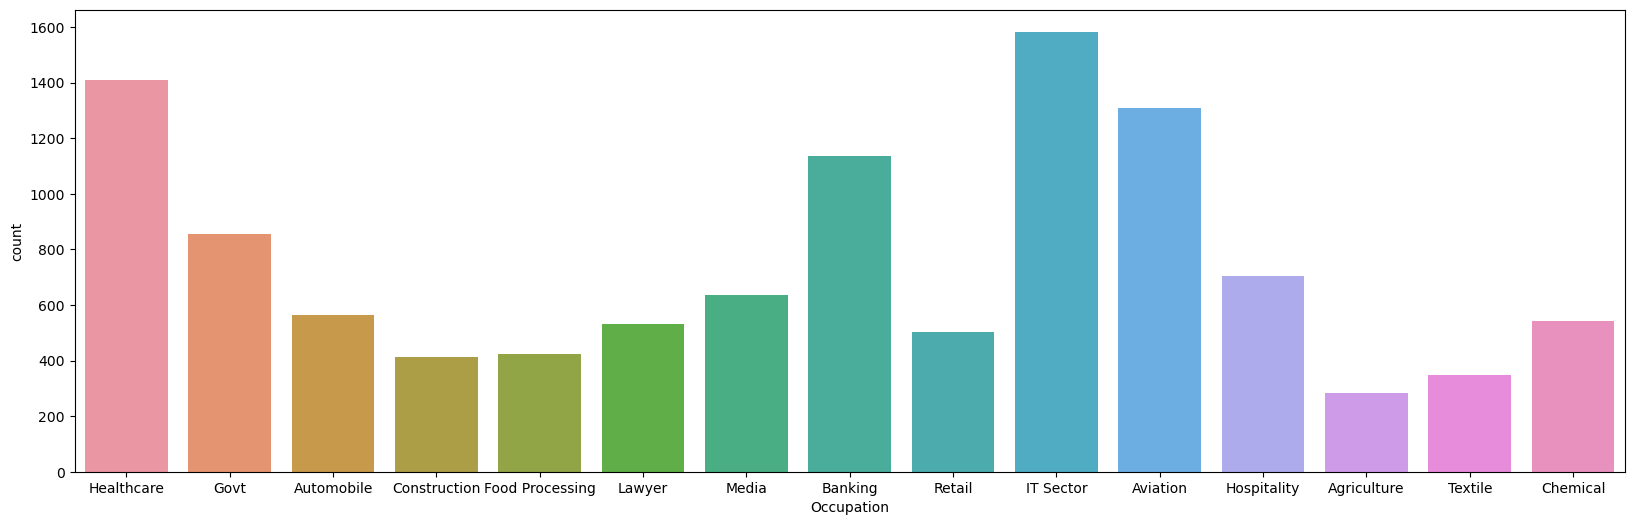

In [30]:
plt.figure(figsize = (20,6))
sns.countplot(x='Occupation', data = df)

<Axes: xlabel='Occupation', ylabel='Amount'>

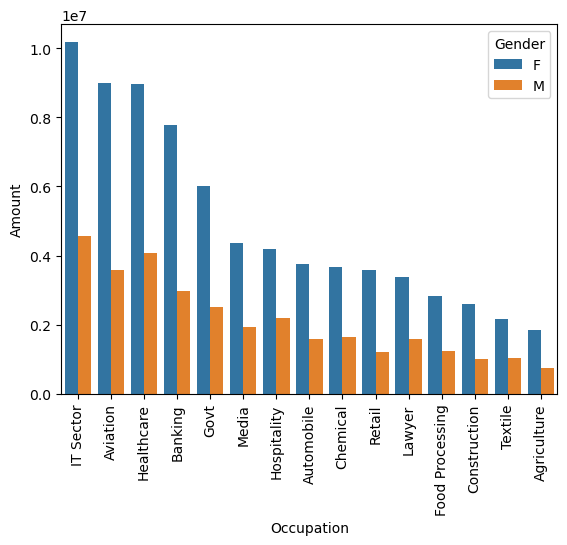

In [31]:
sales_state = df.groupby(['Occupation','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.xticks(rotation=90)
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',hue= 'Gender')

<Axes: xlabel='Occupation', ylabel='Amount'>

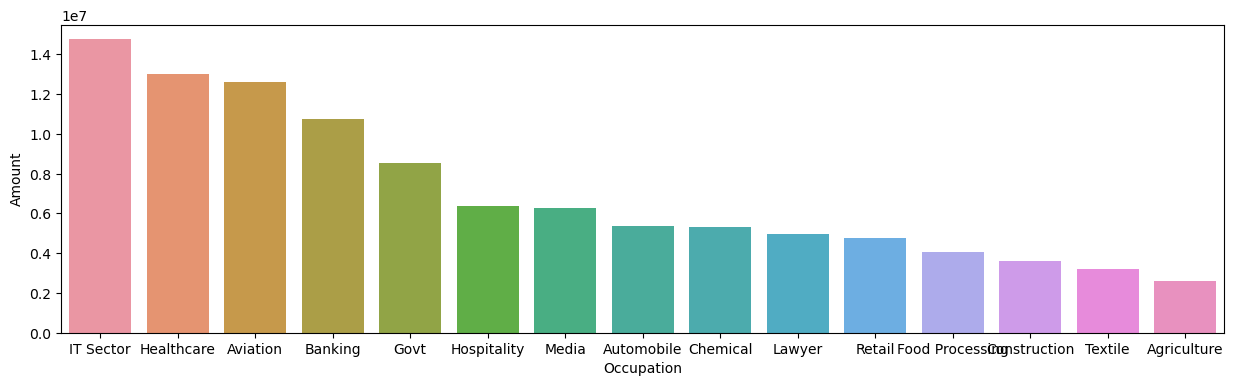

In [32]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize = (15,4))
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

<Axes: xlabel='Product_Category', ylabel='Amount'>

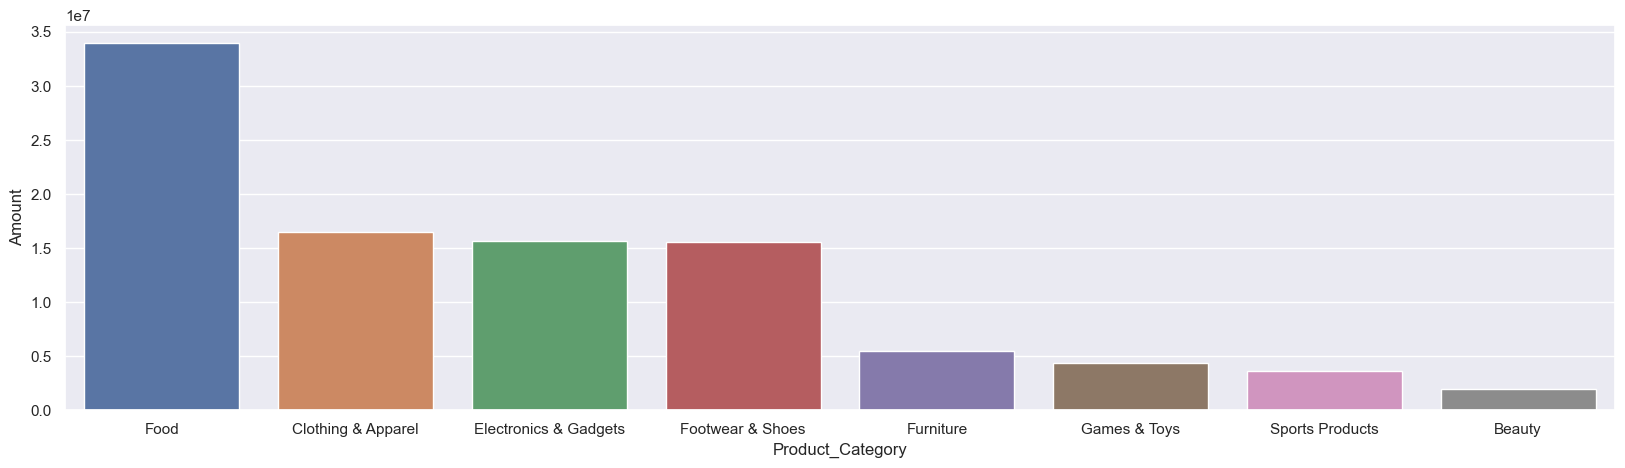

In [33]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(8)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

<Axes: xlabel='Product_Category', ylabel='Amount'>

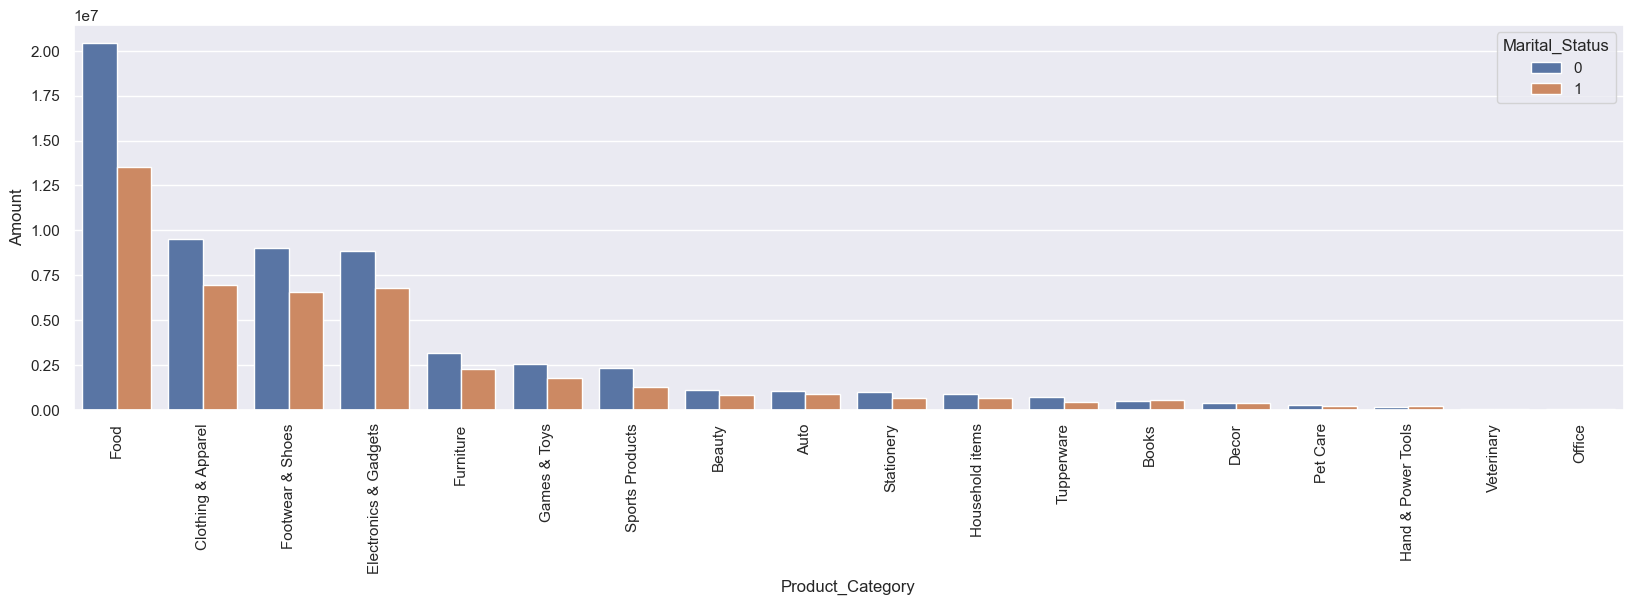

In [34]:
sales_state = df.groupby(['Product_Category', 'Marital_Status'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', hue='Marital_Status')

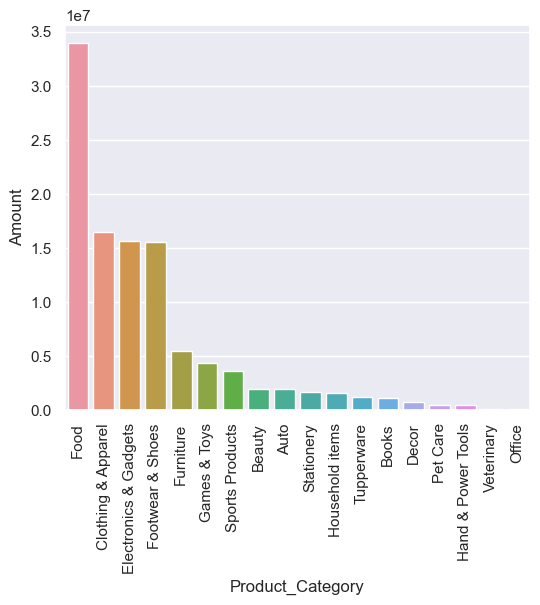

In [35]:
product_sale = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Product_Category',y= 'Amount' ,data = product_sale)
plt.xticks(rotation=90)
plt.show()      

<Axes: xlabel='State', ylabel='Orders'>

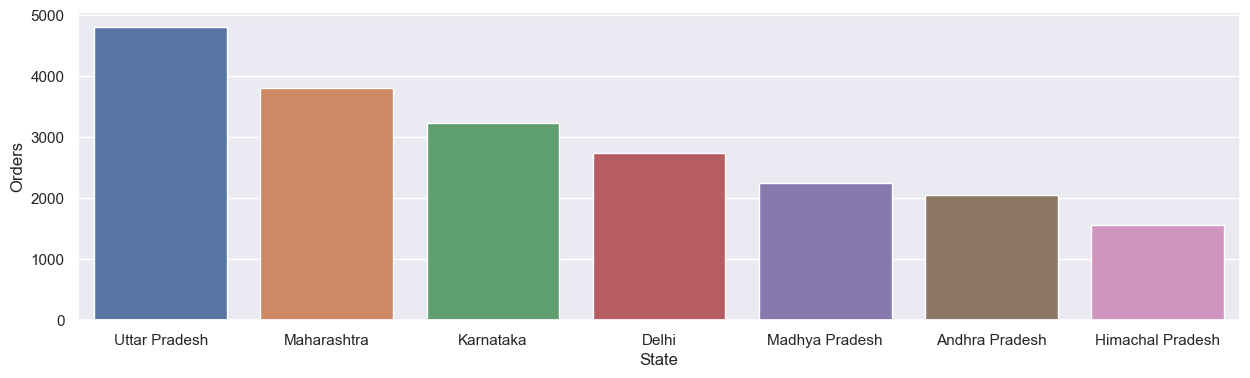

In [36]:
product_sale = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(7)
plt.figure(figsize = (15,4))
sns.barplot(x = 'State',y= 'Orders' ,data = product_sale)

<Axes: xlabel='Product_Category', ylabel='Orders'>

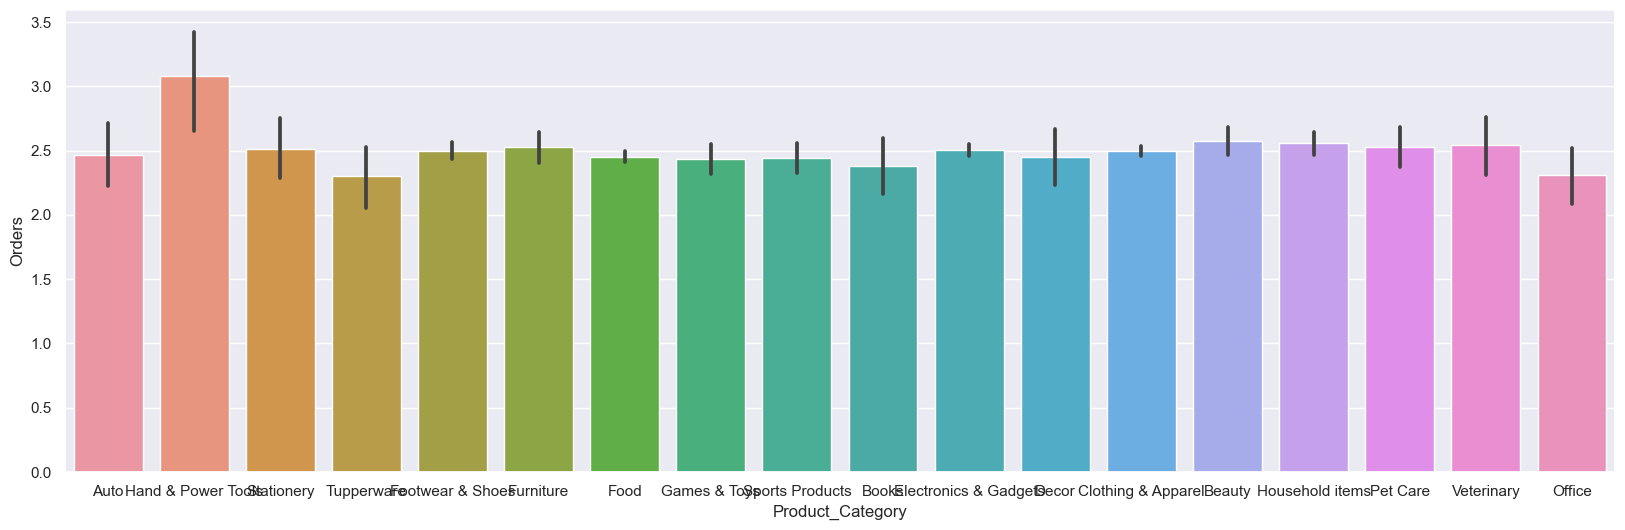

In [37]:
plt.figure(figsize = (20,6))
sns.barplot(x='Product_Category',y='Orders', data = df)

# Observation

Encoding

In [38]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'State', 'Occupation', 'Product_Category'])
df_encoded

,User_ID,Cust_name,Product_ID,Age Group,Age,Marital_Status,Zone,Orders,Amount,Gender_F,...,Product_Category_Furniture,Product_Category_Games & Toys,Product_Category_Hand & Power Tools,Product_Category_Household items,Product_Category_Office,Product_Category_Pet Care,Product_Category_Sports Products,Product_Category_Stationery,Product_Category_Tupperware,Product_Category_Veterinary
0,1002903,Sanskriti,P00125942,26-35,28,0,Western,1,23952.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1000732,Kartik,P00110942,26-35,35,1,Southern,3,23934.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1001990,Bindu,P00118542,26-35,35,1,Central,3,23924.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1001425,Sudevi,P00237842,0-17,16,0,Southern,2,23912.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000588,Joni,P00057942,26-35,28,1,Western,2,23877.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,18-25,19,1,Western,4,370.0,0,...,0,0,0,0,1,0,0,0,0,0
11247,1004089,Reichenbach,P00171342,26-35,33,0,Northern,3,367.0,0,...,0,0,0,0,0,0,0,0,0,1
11248,1001209,Oshin,P00201342,36-45,40,0,Central,4,213.0,1,...,0,0,0,0,1,0,0,0,0,0
11249,1004023,Noonan,P00059442,36-45,37,0,Southern,3,206.0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
df_encoded.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Age Group', 'Age',
       'Marital_Status', 'Zone', 'Orders', 'Amount', 'Gender_F', 'Gender_M',
       'State_Andhra Pradesh', 'State_Bihar', 'State_Delhi', 'State_Gujarat',
       'State_Haryana', 'State_Himachal Pradesh', 'State_Jharkhand',
       'State_Karnataka', 'State_Kerala', 'State_Madhya Pradesh',
       'State_Maharashtra', 'State_Punjab', 'State_Rajasthan',
       'State_Telangana', 'State_Uttar Pradesh', 'State_Uttarakhand',
       'Occupation_Agriculture', 'Occupation_Automobile',
       'Occupation_Aviation', 'Occupation_Banking', 'Occupation_Chemical',
       'Occupation_Construction', 'Occupation_Food Processing',
       'Occupation_Govt', 'Occupation_Healthcare', 'Occupation_Hospitality',
       'Occupation_IT Sector', 'Occupation_Lawyer', 'Occupation_Media',
       'Occupation_Retail', 'Occupation_Textile', 'Product_Category_Auto',
       'Product_Category_Beauty', 'Product_Category_Books',
       'Product_Category_Clothi

In [40]:
df_encoded.shape

(11239, 60)

# Train - Test

In [41]:
x = df_encoded.drop(['Amount','Cust_name','Product_ID','Age Group','Zone'], axis=1)
y = df_encoded['Amount']

In [42]:
x

,User_ID,Age,Marital_Status,Orders,Gender_F,Gender_M,State_Andhra Pradesh,State_Bihar,State_Delhi,State_Gujarat,...,Product_Category_Furniture,Product_Category_Games & Toys,Product_Category_Hand & Power Tools,Product_Category_Household items,Product_Category_Office,Product_Category_Pet Care,Product_Category_Sports Products,Product_Category_Stationery,Product_Category_Tupperware,Product_Category_Veterinary
0,1002903,28,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000732,35,1,3,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1001990,35,1,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1001425,16,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000588,28,1,2,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,19,1,4,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11247,1004089,33,0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11248,1001209,40,0,4,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11249,1004023,37,0,3,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
y

0        23952.0
1        23934.0
2        23924.0
3        23912.0
4        23877.0
          ...   
11246      370.0
11247      367.0
11248      213.0
11249      206.0
11250      188.0
Name: Amount, Length: 11239, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3 , random_state = 42)

In [45]:
x_train

,User_ID,Age,Marital_Status,Orders,Gender_F,Gender_M,State_Andhra Pradesh,State_Bihar,State_Delhi,State_Gujarat,...,Product_Category_Furniture,Product_Category_Games & Toys,Product_Category_Hand & Power Tools,Product_Category_Household items,Product_Category_Office,Product_Category_Pet Care,Product_Category_Sports Products,Product_Category_Stationery,Product_Category_Tupperware,Product_Category_Veterinary
1957,1002469,29,1,4,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5347,1000710,27,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4650,1005479,44,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9628,1003693,32,0,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
484,1001306,34,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,1004007,45,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5203,1000563,29,0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5402,1004513,85,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
872,1005084,20,1,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [47]:
y_train

1957    15596.0
5347     8411.0
4650     9696.0
9628     3865.0
484     19637.0
         ...   
5746     8073.0
5203     8623.0
5402     8299.0
872     19081.0
7282     7005.0
Name: Amount, Length: 7867, dtype: float64

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
m = lr.coef_

In [52]:
c = lr.intercept_

In [53]:
coeff_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
User_ID,3.774387e+01
Age,-2.311785e+01
Marital_Status,3.071229e+01
Orders,-5.684023e-01
Gender_F,-8.179355e+15
Gender_M,-8.179355e+15
State_Andhra Pradesh,-1.548246e+15
State_Bihar,-1.176475e+15
State_Delhi,-1.813093e+15
State_Gujarat,-1.181938e+15


In [54]:
predictions = lr.predict(x_test)

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.635094033602307

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [58]:
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
predictions = lr.predict(x_test)

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)
#0.6349755675683351


0.635094033602307